# Movie Analytics
The film industry is one of the largest entertainment sectors in the world, with thousands of titles released annually. Behind the captivating screenplays and emotionally stirring stories, there is a wealth of important data that can be analyzed to better understand a film's characteristics. From duration, budget, profits, to audience ratings, all these aspects harbor hidden patterns that can be uncovered through statistical approaches and machine learning.

This project aims to glean insights from film data using modern data analysis techniques. The process begins with data exploration to understand the distribution of key variables such as duration and popularity. Next, transformation and segmentation based on ratings are performed, and films are grouped to identify specific trends. In the final stage, classification models such as K-Nearest Neighbors (KNN) and Decision Trees are used to predict film quality based on available features.

Through this approach, we not only seek to answer questions like "what kind of films do audiences like?" but also strive to build predictive models that can aid decision-making in the film industry. Movie Analytics opens a new perspective by viewing films not only as works of art but also as objects of data analysis rich in information.

# Import Packages

In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation

In [2]:
movies_data = pd.read_csv("C:/Users/LENOVO/Python/movies_metadata.csv")

In [3]:
movies_data.shape

(45463, 24)

## Understand descriptive statistical summaries of data
Look at statistics such as the minimum, maximum, mean, and quartiles of a numeric column to understand the distribution and spread of the initial data.

In [4]:
movies_data.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.546300e+04,45463.000000,45460.000000,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,4.224579e+06,108359.918813,2.921478,1.120935e+07,94.128199,5.618207,109.897338
std,1.742413e+07,112460.749278,6.005414,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,26449.500000,0.385948,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,60003.000000,1.127685,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,157328.000000,3.678902,0.000000e+00,107.000000,6.800000,34.000000
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000


Some notes:
* The number of entries for each column is close to 45,460, indicating relatively complete data, although runtime is slightly lower (45,203).
* The mean budget and revenue values are quite high, at around 4.2 million and 11.2 million, respectively, but the large standard deviations indicate a very wide distribution of data.
* Many films have a value of 0 for budget and revenue, as evidenced by the minimum and lower quartile values (25%, 50%, and 75%) being all zero. This could indicate missing or unrecorded data.
* Popularity has a low average (2.92) but a very high maximum (547), indicating some outliers of very popular films.
* The average runtime is 94 minutes with a maximum of 1256 minutes, which is likely an outlier or data error.
* The average vote_average is 5.6 out of 10, with a maximum of 10, and most films scored between 5 and 6.8.
* The vote_count indicates that many films have very low vote counts (the median is only 10), but there are several films with very high vote counts of up to 14,075, indicating an uneven distribution of popularity among films.

In [5]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45463 non-null  bool   
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45463 non-null  int64  
 3   genres                 45463 non-null  object 
 4   homepage               7779 non-null   object 
 5   id                     45463 non-null  int64  
 6   imdb_id                45446 non-null  object 
 7   original_language      45452 non-null  object 
 8   original_title         45463 non-null  object 
 9   overview               44509 non-null  object 
 10  popularity             45460 non-null  float64
 11  poster_path            45077 non-null  object 
 12  production_companies   45460 non-null  object 
 13  production_countries   45460 non-null  object 
 14  release_date           45376 non-null  object 
 15  re

## Getting to know the top 5 rows of data
Displays the first 5 rows of the dataset to get an overview of the data structure and content.

In [6]:
movies_data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,True,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,True,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,True,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,True,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,True,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


## Find the bottom 5 rows of data
Displays the last 5 rows of the dataset to ensure there are no odd rows at the end of the data.

In [7]:
movies_data.tail()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
45458,True,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45459,True,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45460,True,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45461,True,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0
45462,True,NaN,0,[],NaN,461257,tt6980792,en,Queerama,50 years after decriminalisation of homosexual...,...,2017-06-09,0.0,75.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Queerama,False,0.0,0.0


## Take 10 random rows of data
Take 10 random rows from the dataset as another way to check the diversity of the data content.

In [8]:
movies_data.sample(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19774,True,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",http://www.brooklyncastle.com/,95808,tt1800266,en,Brooklyn Castle,Brooklyn Castle is a documentary about I.S. 31...,...,2012-10-19,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Imagine a school where the cool kids are the c...,Brooklyn Castle,False,7.5,8.0
18302,True,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.friendswithkids.com/#,80038,tt1720616,en,Friends with Kids,In the wake of their friends' marriages and ev...,...,2011-09-09,12186625.0,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Love. Happiness. Kids. Pick two.,Friends with Kids,False,5.7,175.0
14546,True,NaN,170000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",NaN,19197,tt1129428,en,Mum & Dad,"Mum and Dad, and their 'adopted' children, Bir...",...,2008-08-22,0.0,84.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Parents can be bloody murder.,Mum & Dad,False,6.3,49.0
36092,True,NaN,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,48242,tt0087436,en,Hundra,"Born in a tribe of fierce warrior women, Hundr...",...,1983-01-01,0.0,109.0,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,A Woman who could not be tamed!,Hundra,False,5.8,6.0
9933,True,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,37512,tt0075165,de,Satansbraten,This fast-paced black comedy by wunderkind dir...,...,1976-10-07,0.0,113.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,NaN,Satan's Brew,False,6.9,7.0
9180,True,NaN,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...",NaN,3716,tt0177858,de,Im Juli,Can Daniel follow the sun from Hamburg to the ...,...,2000-08-23,0.0,100.0,"[{'iso_639_1': 'ro', 'name': 'Română'}, {'iso_...",Released,A Summer Night's Dream,In July,False,7.5,54.0
14699,True,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,25594,tt1393000,en,Wrong Turn at Tahoe,A debt collector for the mob (Academy Award(R)...,...,2009-11-16,0.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A small-time crime boss kills a drug dealer wi...,Wrong Turn at Tahoe,False,6.3,24.0
23465,True,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://mikraaggliafilm.gr/,228339,tt3253650,el,Μικρά Αγγλία,"Τwo sisters from the island of Andros, dubbed ...",...,2013-12-05,0.0,160.0,"[{'iso_639_1': 'el', 'name': 'ελληνικά'}]",Released,"One home, one secret, one man, two sisters.",Little England,False,6.6,16.0
18018,True,NaN,0,[],NaN,113137,tt0163559,en,The Book of Stars,A tale of two sisters. Penny (Masterson) cares...,...,1999-06-06,0.0,111.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Book of Stars,False,7.0,2.0
43384,True,NaN,1000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",NaN,33914,tt0087291,en,Frankenweenie,When young Victor's pet dog Sparky (who stars ...,...,1984-12-14,0.0,29.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A comic twist on a classic tail!,Frankenweenie,False,6.7,96.0


## Converting the release_date data type to datetime
Converts the release_date column from a string to a datetime type so that it can be processed temporally (e.g., date filters, sorting, etc.).

In [9]:
movies_data["release_date"] = pd.to_datetime(movies_data["release_date"])

In [10]:
movies_data["release_date"].dtypes

dtype('<M8[ns]')

## Find out which movies have been released
Checks movies with a release date that is past today's date to separate movies that have been released from those that haven't.

In [11]:
movies_data[movies_data['status'] == "Released"]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,True,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,True,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,True,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,True,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,True,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45458,True,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaT,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45459,True,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45460,True,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45461,True,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


## Find out the titles of films that have been released
Displays a list of titles of films that have been released based on the release_date in the past.

In [12]:
movies_data.loc[movies_data['status'] == "Released", ['title','original_title']]

,title,original_title
0,Toy Story,Toy Story
1,Jumanji,Jumanji
2,Grumpier Old Men,Grumpier Old Men
3,Waiting to Exhale,Waiting to Exhale
4,Father of the Bride Part II,Father of the Bride Part II
...,...,...
45458,Subdue,رگ خواب
45459,Century of Birthing,Siglo ng Pagluluwal
45460,Betrayal,Betrayal
45461,Satan Triumphant,Satana likuyushchiy


## Find out the unique value of a movie's status
See how many status types are available in the status column (e.g., Released, Rumored, etc.).

In [13]:
movies_data["status"].unique()

array(['Released', nan, 'Rumored', 'Post Production', 'In Production',
       'Planned', 'Canceled'], dtype=object)

## Knowing the number of unique original language values
Determine how many different languages are used in a film for linguistic analysis or segmentation purposes.

In [14]:
movies_data["original_language"].nunique()

89

## Identify rows where the status is released
Filter rows in the dataset that have the movie status "Released" as part of data cleaning.

In [15]:
movies_data["status"] == "Released"

0        True
1        True
2        True
3        True
4        True
         ... 
45458    True
45459    True
45460    True
45461    True
45462    True
Name: status, Length: 45463, dtype: bool

## Sorting data by release_date column
Arranges data chronologically by release date, either from earliest to latest or vice versa.

In [16]:
movies_data.sort_values(by = "release_date", ascending=True)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
34938,True,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,315946,tt3155794,xx,Passage de Venus,Photo sequence of the rare transit of Venus ov...,...,1874-12-09,0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Passage of Venus,False,6.0,19.0
34935,True,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,194079,tt2221420,en,Sallie Gardner at a Gallop,Sallie Gardner at a Gallop was one of the earl...,...,1878-06-14,0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Sallie Gardner at a Gallop,False,6.2,25.0
41599,True,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,426903,tt5459794,en,Buffalo Running,Individual photographs of the running of a buf...,...,1883-11-19,0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Buffalo Running,False,5.4,7.0
34931,True,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,159897,tt2075247,xx,Man Walking Around a Corner,The last remaining production of Le Prince's L...,...,1887-08-18,0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Man Walking Around a Corner,False,4.1,17.0
34932,True,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,96882,tt1758563,xx,Accordion Player,The last remaining film of Le Prince's LPCCP T...,...,1888-01-01,0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Accordion Player,False,4.4,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45145,True,NaN,0,[],NaN,438910,tt0810384,ru,Konstruktor krasnogo tsveta -1993,Engineering Red - 1993 Dir: Andrey I. Y. Petr...,...,NaT,0.0,76.0,[],Released,NaN,Engineering Red,False,6.0,2.0
45200,True,NaN,0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 878, ...",NaN,433711,tt3158690,en,All Superheroes Must Die 2: The Last Superhero,"In a no holds barred documentary, acclaimed jo...",...,NaT,0.0,74.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,All Superheroes Must Die 2: The Last Superhero,False,4.0,1.0
45335,True,NaN,0,[],NaN,335251,tt1883368,en,The Land Where the Blues Began,An exploration of the musical and social origi...,...,NaT,0.0,0.0,[],Released,NaN,The Land Where the Blues Began,False,0.0,0.0
45407,True,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,449131,tt0321264,ru,Aprel,NaN,...,NaT,0.0,NaN,[],Released,NaN,Aprel,False,6.0,1.0


# Preprocessing Data

## Generating English-language and released film data
Filtering the dataset to only include films with original_language = "en" and status = "Released" to focus the analysis more consistently and relevantly.

In [17]:
english_release = movies_data[(movies_data['status'] == "Released") & (movies_data['original_language'] == "en")]

In [18]:
movies_data.sort_values("release_date", ascending=True)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
34938,True,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,315946,tt3155794,xx,Passage de Venus,Photo sequence of the rare transit of Venus ov...,...,1874-12-09,0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Passage of Venus,False,6.0,19.0
34935,True,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,194079,tt2221420,en,Sallie Gardner at a Gallop,Sallie Gardner at a Gallop was one of the earl...,...,1878-06-14,0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Sallie Gardner at a Gallop,False,6.2,25.0
41599,True,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,426903,tt5459794,en,Buffalo Running,Individual photographs of the running of a buf...,...,1883-11-19,0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Buffalo Running,False,5.4,7.0
34931,True,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,159897,tt2075247,xx,Man Walking Around a Corner,The last remaining production of Le Prince's L...,...,1887-08-18,0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Man Walking Around a Corner,False,4.1,17.0
34932,True,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,96882,tt1758563,xx,Accordion Player,The last remaining film of Le Prince's LPCCP T...,...,1888-01-01,0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Accordion Player,False,4.4,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45145,True,NaN,0,[],NaN,438910,tt0810384,ru,Konstruktor krasnogo tsveta -1993,Engineering Red - 1993 Dir: Andrey I. Y. Petr...,...,NaT,0.0,76.0,[],Released,NaN,Engineering Red,False,6.0,2.0
45200,True,NaN,0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 878, ...",NaN,433711,tt3158690,en,All Superheroes Must Die 2: The Last Superhero,"In a no holds barred documentary, acclaimed jo...",...,NaT,0.0,74.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,All Superheroes Must Die 2: The Last Superhero,False,4.0,1.0
45335,True,NaN,0,[],NaN,335251,tt1883368,en,The Land Where the Blues Began,An exploration of the musical and social origi...,...,NaT,0.0,0.0,[],Released,NaN,The Land Where the Blues Began,False,0.0,0.0
45407,True,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,449131,tt0321264,ru,Aprel,NaN,...,NaT,0.0,NaN,[],Released,NaN,Aprel,False,6.0,1.0


## Determining the number of duplicate data
Count the total number of rows indicated as duplicates across all columns to avoid bias in the analysis.

In [19]:
movies_data.duplicated().sum()

np.int64(17)

## Identifying duplicate data
Mark rows that have identical content across columns using __.duplicated()__.

In [20]:
movies_data.duplicated(keep = False)

0        False
1        False
2        False
3        False
4        False
         ...  
45458    False
45459    False
45460    False
45461    False
45462    False
Length: 45463, dtype: bool

## Display duplicate data
Displays all rows that are indicated as duplicates so they can be checked manually.

In [21]:
movies_data[movies_data.duplicated()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
1465,True,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,105045,tt0111613,de,Das Versprechen,"East-Berlin, 1961, shortly after the erection ...",...,1995-02-16,0.0,115.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,"A love, a hope, a wall.",The Promise,False,5.0,1.0
9165,True,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,5511,tt0062229,fr,Le Samouraï,Hitman Jef Costello is a perfectionist who alw...,...,1967-10-25,39481.0,105.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,There is no solitude greater than that of the ...,Le Samouraï,False,7.9,187.0
9327,True,NaN,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",NaN,23305,tt0295682,en,The Warrior,"In feudal India, a warrior (Khan) who renounce...",...,2001-09-23,0.0,86.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,NaN,The Warrior,False,6.3,15.0
13375,True,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",NaN,141971,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,...,2008-12-26,0.0,108.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.7,3.0
16764,True,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",NaN,141971,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,...,2008-12-26,0.0,108.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.7,3.0
21164,True,NaN,0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",NaN,119916,tt0080000,en,The Tempest,"Prospero, the true Duke of Milan is now living...",...,1980-02-27,0.0,123.0,[],Released,NaN,The Tempest,False,0.0,0.0
21853,True,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 878, 'nam...",NaN,152795,tt1821641,en,The Congress,More than two decades after catapulting to sta...,...,2013-05-16,455815.0,122.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Congress,False,6.4,165.0
22150,True,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 27, 'nam...",http://www.daysofdarknessthemovie.com/,18440,tt0499456,en,Days of Darkness,When a comet strikes Earth and kicks up a clou...,...,2007-01-01,0.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Days of Darkness,False,5.0,5.0
23043,True,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,25541,tt1327820,da,Broderskab,Former Danish servicemen Lars and Jimmy are th...,...,2009-10-21,0.0,90.0,"[{'iso_639_1': 'da', 'name': 'Dansk'}]",Released,NaN,Brotherhood,False,7.1,21.0
24843,True,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.dealthemovie.com/,11115,tt0446676,en,Deal,As an ex-gambler teaches a hot-shot college ki...,...,2008-01-29,0.0,85.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Deal,False,5.2,22.0


## View duplicate data based on the original_title column
Detects whether a movie with the same original title appears more than once, even if other columns are different.

In [22]:
movies_data.duplicated(subset = "original_title")

0        False
1        False
2        False
3        False
4        False
         ...  
45458    False
45459    False
45460     True
45461    False
45462    False
Length: 45463, dtype: bool

## Find out the number of duplicate data based on original_title
Counts how many movie titles appear more than once in the original_title column.

In [23]:
movies_data.duplicated(subset = "original_title").sum()

np.int64(2092)

## Randomly displays 10 duplicate records based on the original_title column
Takes a random sample of duplicate movie titles to check their validity before cleaning.

In [24]:
movies_data[movies_data.duplicated(subset = "original_title")].sample(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19889,True,NaN,0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",NaN,119916,tt0080000,en,The Tempest,"Prospero, the true Duke of Milan is now living...",...,1980-02-27,0.0,123.0,[],Released,NaN,The Tempest,False,0.0,0.0
40208,True,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",NaN,360321,tt4820296,en,Nocturna,Two New Orleans detectives become embroiled in...,...,2015-10-06,0.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"To live forever, first you must die",Nocturna,False,4.6,9.0
16314,True,NaN,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,36115,tt0997263,en,Unmade Beds,Axl wants to find his long-lost father and red...,...,2009-09-02,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"Bright Lights, Lost souls...",Unmade Beds,False,6.1,12.0
31053,True,NaN,0,"[{'id': 36, 'name': 'History'}, {'id': 12, 'na...",NaN,4199,tt0074853,en,The Man in the Iron Mask,The story of Louis XIV of France and his attem...,...,1977-07-07,0.0,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Man in the Iron Mask,False,6.1,17.0
35361,True,NaN,30000000,"[{'id': 35, 'name': 'Comedy'}]",http://www.sistersfilm.com/,266294,tt1850457,en,Sisters,Two disconnected sisters are summoned to clean...,...,2015-12-18,105011053.0,118.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Big sisters don't always know best.,Sisters,False,5.8,593.0
41075,True,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",NaN,263260,tt0047843,de,Aschenputtel,NaN,...,1955-09-03,0.0,NaN,[],Released,NaN,Aschenputtel,False,7.0,1.0
24913,True,NaN,0,[],NaN,183119,tt0188773,en,Kiss Me Goodbye,"Zedd plays D.B. Shane, a dead star who visits ...",...,1986-01-01,0.0,0.0,[],Released,NaN,Kiss Me Goodbye,False,7.0,1.0
12733,True,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,27504,tt0021505,en,The Unholy Three,"""Talkie"" remake of Tod Browning's 1925 silent ...",...,1930-07-03,0.0,72.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Unholy Three,False,2.5,2.0
19761,True,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,110540,tt0024819,en,The Age of Innocence,An engaged attorney and a divorcee fall for ea...,...,1934-09-14,0.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Age of Innocence,False,0.0,0.0
39662,True,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,373473,tt4919484,en,Little Men,"Jake is a quiet, sensitive middle schooler wit...",...,2016-08-05,0.0,85.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Be on each other's side,Little Men,False,6.7,47.0


## Remove duplicate data
Remove rows identified as duplicates to prevent them from affecting the analysis.

In [25]:
movies_data.drop_duplicates()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,True,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,True,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,True,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,True,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,True,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45458,True,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaT,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45459,True,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45460,True,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45461,True,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [26]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  45463 non-null  bool          
 1   belongs_to_collection  4491 non-null   object        
 2   budget                 45463 non-null  int64         
 3   genres                 45463 non-null  object        
 4   homepage               7779 non-null   object        
 5   id                     45463 non-null  int64         
 6   imdb_id                45446 non-null  object        
 7   original_language      45452 non-null  object        
 8   original_title         45463 non-null  object        
 9   overview               44509 non-null  object        
 10  popularity             45460 non-null  float64       
 11  poster_path            45077 non-null  object        
 12  production_companies   45460 non-null  object        
 13  p

## Identifying missing data
Displays the number of NaN values in each column to understand how much data is missing.

In [27]:
movies_data.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   3
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      3
runtime                    260
spoken_languages             3
status                      84
tagline                  25051
title                        3
video                        0
vote_average                 3
vote_count                   3
dtype: int64

## Filling missing data with "None"
Replaces missing values in a specific column with the string "None" to indicate that there is no information (not an error).

In [28]:
movies_data["poster_path"] = movies_data["poster_path"].fillna("None")

In [29]:
movies_data.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   3
poster_path                  0
production_companies         3
production_countries         3
release_date                87
revenue                      3
runtime                    260
spoken_languages             3
status                      84
tagline                  25051
title                        3
video                        0
vote_average                 3
vote_count                   3
dtype: int64

## Menghapus data hilang berdasarkan tagline
Menghapus baris yang memiliki nilai hilang pada kolom tagline jika dirasa tidak dapat ditoleransi atau tidak bisa diisi.

In [30]:
# movies_data.dropna() # Will delete all
# movies_data.dropna(axis=1) # Delete columns that contain NaN
movies_data = movies_data.dropna(subset=['tagline']) # Delete rows that contain NaN in a specific column

In [31]:
movies_data.isna().sum()

adult                        0
belongs_to_collection    17840
budget                       0
genres                       0
homepage                 16001
id                           0
imdb_id                      4
original_language            0
original_title               0
overview                     8
popularity                   0
poster_path                  0
production_companies         0
production_countries         0
release_date                14
revenue                      0
runtime                      0
spoken_languages             0
status                      14
tagline                      0
title                        0
video                        0
vote_average                 0
vote_count                   0
dtype: int64

In [32]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20412 entries, 1 to 45460
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  20412 non-null  bool          
 1   belongs_to_collection  2572 non-null   object        
 2   budget                 20412 non-null  int64         
 3   genres                 20412 non-null  object        
 4   homepage               4411 non-null   object        
 5   id                     20412 non-null  int64         
 6   imdb_id                20408 non-null  object        
 7   original_language      20412 non-null  object        
 8   original_title         20412 non-null  object        
 9   overview               20404 non-null  object        
 10  popularity             20412 non-null  float64       
 11  poster_path            20412 non-null  object        
 12  production_companies   20412 non-null  object        
 13  produc

In [33]:
movies_data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
1,True,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,True,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,True,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,True,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,True,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0


## Fetching multiple columns with .loc
Use __.loc__ to select specific columns from filtered rows to facilitate further analysis.

In [34]:
movies_data.loc[:,["original_title","original_language","spoken_languages","status"]]

,original_title,original_language,spoken_languages,status
1,Jumanji,en,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released
2,Grumpier Old Men,en,"[{'iso_639_1': 'en', 'name': 'English'}]",Released
3,Waiting to Exhale,en,"[{'iso_639_1': 'en', 'name': 'English'}]",Released
4,Father of the Bride Part II,en,"[{'iso_639_1': 'en', 'name': 'English'}]",Released
5,Heat,en,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released
...,...,...,...,...
45451,The Morning After,en,"[{'iso_639_1': 'en', 'name': 'English'}]",Released
45453,House of Horrors,en,"[{'iso_639_1': 'en', 'name': 'English'}]",Released
45455,The Burkittsville 7,en,"[{'iso_639_1': 'en', 'name': 'English'}]",Released
45458,رگ خواب,fa,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released


## Displays the top 10 released films, sorted by highest vote count.
Sorts data by vote_average to find the highest-rated films released.

In [35]:
release_movie = movies_data[movies_data['status']=='Released'].sort_values(by = 'vote_count', ascending=True)
release_movie.head(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
43244,True,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,34057,tt0251744,en,In Memory of My Father,The youngest son of a legendary Hollywood prod...,...,2005-06-03,0.0,96.0,[],Released,... but what about me?,In Memory of My Father,False,0.0,0.0
21731,True,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 37, 'nam...",NaN,103168,tt0044367,en,Apache Country,A criminal gang provokes the local Apaches in ...,...,1952-05-30,0.0,62.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,SEE GENE'S SIX-SHOOTERS NAIL WHITE LOOTERS BEH...,Apache Country,False,0.0,0.0
15539,True,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,85023,tt0070435,en,A Name for Evil,Dissatisfied with the family architectural bus...,...,1973-01-01,0.0,74.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The dream house that becomes a nightmare.,A Name for Evil,False,0.0,0.0
15536,True,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",http://www.hbo.com/documentaries/the-last-truc...,37098,tt1487120,en,The Last Truck: Closing of a GM Plant,The inside story of the last days of a General...,...,2009-09-07,0.0,40.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Families. Friends. Lives On The Line.,The Last Truck: Closing of a GM Plant,False,0.0,0.0
15531,True,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,96525,tt0025536,en,Music in the Air,Constantly quarrelling couple decide to try th...,...,1934-12-13,0.0,85.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Gloria Swanson, more glorious than ever!",Music in the Air,False,0.0,0.0
15528,True,NaN,0,"[{'id': 99, 'name': 'Documentary'}, {'id': 104...",http://www.smashingpumpkins.com,20996,tt1236247,en,Smashing Pumpkins: If All Goes Wrong,A feature-length documentary about The Smashin...,...,2008-11-11,0.0,271.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Who would you believe,Smashing Pumpkins: If All Goes Wrong,False,0.0,0.0
29934,True,NaN,0,"[{'id': 10751, 'name': 'Family'}, {'id': 35, '...",NaN,193387,tt0081145,en,Me and the Kid,A lonely and emotionally neglected rich kid fo...,...,1993-10-22,0.0,94.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What can you give a kid who has everything? A ...,Me and the Kid,False,0.0,0.0
19492,True,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,127700,tt1695409,en,The Newest Pledge,The morning after kicking off their semester w...,...,2012-08-28,0.0,85.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,His GPA is greater than his age!,The Newest Pledge,False,0.0,0.0
18616,True,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,44053,tt1129921,en,Bustin' Down the Door,"During the winter of 1975 in Hawaii, surfing w...",...,2008-07-25,0.0,96.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,In 1975 a group of young surfers revolutionize...,Bustin' Down the Door,False,0.0,0.0
21719,True,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,249333,tt0040473,en,An Innocent Affair,Vincent Doane is in the precarious position of...,...,1948-10-15,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They're burning the Scandal at both ends...,An Innocent Affair,False,0.0,0.0


## Showing films longer than 3 hours
Filtering films with a runtime longer than 180 minutes to assess extreme lengths and their potential impact on popularity.

In [36]:
movies_data[movies_data['runtime'] > 3]["title"]

1                            Jumanji
2                   Grumpier Old Men
3                  Waiting to Exhale
4        Father of the Bride Part II
5                               Heat
                    ...             
45451              The Morning After
45453               House of Horrors
45455            The Burkittsville 7
45458                         Subdue
45460                       Betrayal
Name: title, Length: 20268, dtype: object

## Create a profit column based on revenue and budget
Calculate the film's profit by subtracting the budget from the revenue and then saving it as a new profit column.

In [37]:
movies_data["profit"] = movies_data["revenue"] - movies_data["budget"]

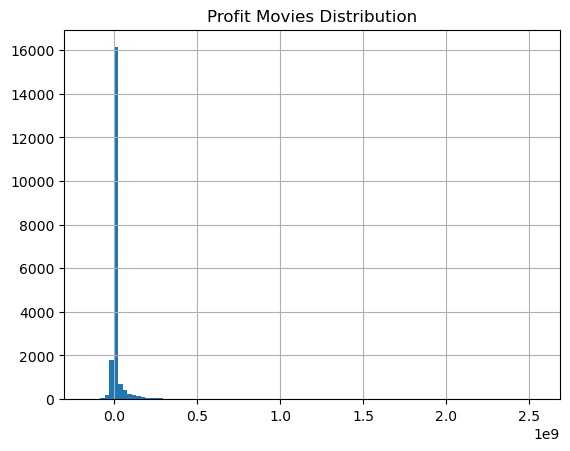

In [38]:
movies_data["profit"].hist(bins = 100)
plt.title("Profit Movies Distribution")
plt.show()

In [39]:
movies_data["profit"].describe()

count    2.041200e+04
mean     1.514787e+07
std      7.596066e+07
min     -1.657101e+08
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.550965e+09
Name: profit, dtype: float64

Some notes:
1. The distribution is highly skewed to the right.
   - The majority of films had profits close to zero or even negative. This is evident from the very high peak around 0 profit on the histogram.
   - Statistics also support this: the median (50%) profit is 0, and the upper quartile (75%) is also 0, meaning that at least 75% of films made no or only a small profit.
2. Extreme outliers
   - The maximum profit reached 2.55 billion USD, resulting in a long tail of the distribution to the right. This is experienced by only a handful of films with extraordinary success.
   - The very large standard deviation (±75 million) compared to the average profit (15 million) indicates extreme variation between films.
3. Losses
   - The minimum profit was -165.7 million, indicating that some films made significant losses.

In [40]:
import seaborn as sns

<Axes: >

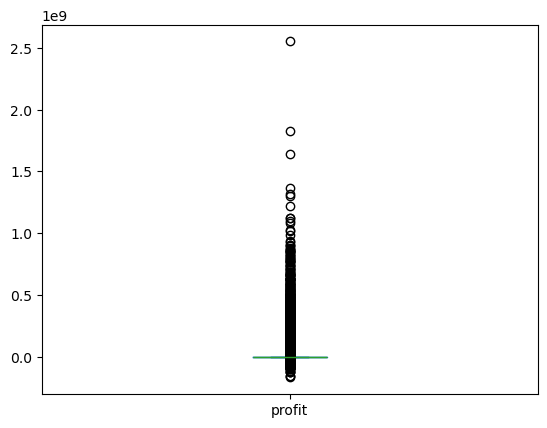

In [41]:
movies_data["profit"].plot(kind = "box")

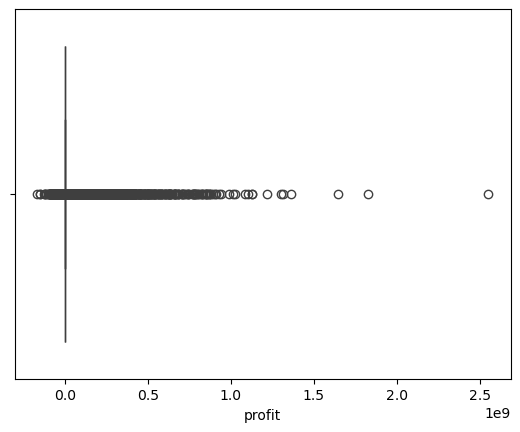

In [42]:
sns.boxplot(data = movies_data, x = "profit")
plt.show()

Some notes:
1. The data distribution is highly non-normal/asymmetrical
    - The boxplot shows a very narrow box (interquartile range, IQR) near profit = 0, indicating that the majority of the data falls within the low-profit range or even no profit.
    - The median line within the box is very close to the lower limit of the box, supporting the previous histogram findings: more than half of the films generated only very small or negative profits.
2. Extremely long right tail
    - Many of the points on the right side of the circle are high-profit outliers — representing blockbuster films with extraordinary profits.
    - The furthest point, around $2.5 billion, confirms that there are films with very large profits, but they are few in number.
3. Outliers are very dominant
    - Almost the entire profit distribution appears to be "clustered" near 0, with only a few films generating large profit outliers.

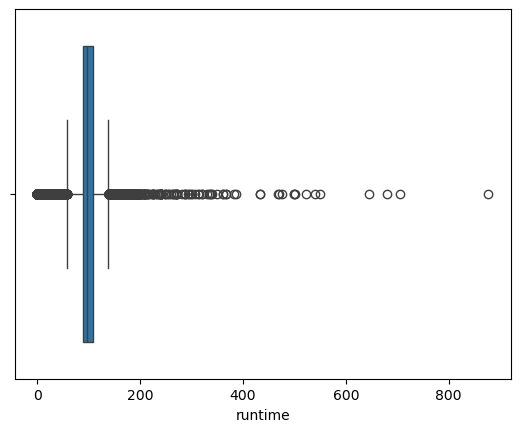

In [43]:
sns.boxplot(data = movies_data, x = "runtime")
plt.show()

In [44]:
movies_data["profit"].quantile(0.9)

np.float64(29858351.600000057)

Some notes:
* The majority of runtimes are concentrated in the typical movie range.
The box (IQR) and whisker indicate that the majority of films are around 90–130 minutes long. This is consistent with the standard length for commercial films.
* The median is close to the middle of the box.
This means that the distribution of primary runtimes is relatively symmetrical for films that are not outliers.
* Many outliers to the right (extremely long runtimes).
The dots to the right detect films with very long runtimes (>200 minutes, some approaching 900 minutes!).
* The distribution is highly right-skewed.
While the primary data is symmetrical, the long tail to the right indicates that some films have significantly longer runtimes than the average.

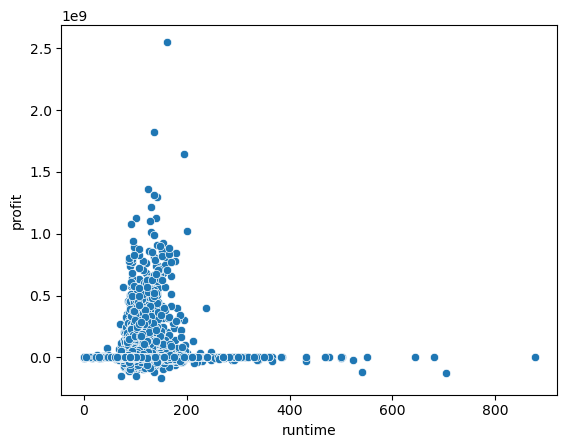

In [45]:
sns.scatterplot(data = movies_data,
                x = "runtime",
                y = "profit")
plt.show()

## Knowing the distribution of profits that are more than 0 or profits that are profitable

In [46]:
profitable_movies = movies_data[movies_data["profit"] > 0]

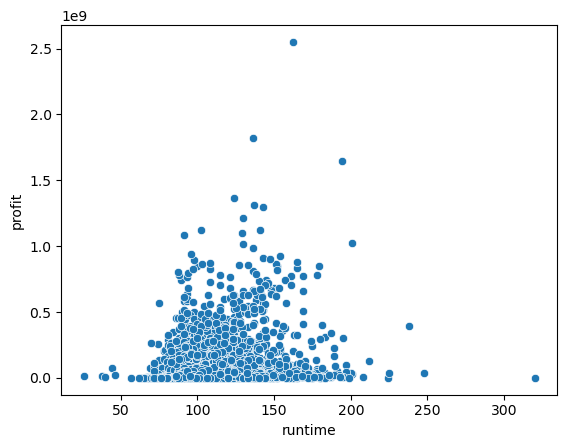

In [47]:
sns.scatterplot(data = profitable_movies,
                x = "runtime",
                y = "profit")
plt.show()

Some notes:
1. The majority of films are 80–180 minutes long.
    - A very high density of dots is observed in the standard theatrical runtime range (around 90–150 minutes).
2. Large profits are only found in the standard runtime range.
    - The dots with the largest profits (>1 billion) are all in the 90–160 minute runtime range.
    - This indicates that films with a normal runtime are more likely to generate large profits.
3. Extreme runtimes (outliers) tend to generate losses or small profits.
    - Films over 300 minutes almost all have profits close to zero or negative.
    - This means that very long films do not generate large profits, but instead have the potential to generate losses.
4. There is no clear linear relationship between runtime and profit.
    - The distribution of dots is spread out without a clear line pattern or trend.
    - The correlation between runtime and profit appears weak.

# Feature Engineering

In [48]:
#reading the dataset
rating = pd.read_csv("C:/Users/LENOVO/Python/ratings_small.csv")

#converting the data type to datetime
rating['timestamp'] = pd.to_datetime(rating['timestamp'], unit='s')

#checking for duplicate data
rating.duplicated().sum()

#checking for missing values
rating.isna().sum()

#userId and moveID are foreign keys and have a many-to-many relationship (one individual can vote for many movies, and one movie can be voted on by many users).
#We will calculate the mean, median, and the number of users who rated a movie.
#using aggregate.
rating_movies = rating.groupby("movieId")["rating"].agg(["mean", "count", "median"])
rating_movies

,mean,count,median
movieId,,,
1,3.872470,247,4.0
2,3.401869,107,3.0
3,3.161017,59,3.0
4,2.384615,13,3.0
5,3.267857,56,3.0
...,...,...,...
161944,5.000000,1,5.0
162376,4.500000,1,4.5
162542,5.000000,1,5.0


## Aggregation with multiple columns
Group data by movieId and then apply an aggregation function (such as mean, count, sum) to multiple columns at once. This is useful for efficiently summarizing important information.

In [49]:
rating.groupby("movieId").agg({"userId": pd.Series.nunique, "rating":["mean", "median"]})

userId    rating       
        nunique      mean median
movieId                         
1           247  3.872470    4.0
2           107  3.401869    3.0
3            59  3.161017    3.0
4            13  2.384615    3.0
5            56  3.267857    3.0
...         ...       ...    ...
161944        1  5.000000    5.0
162376        1  4.500000    4.5
162542        1  5.000000    5.0
162672        1  3.000000    3.0
163949        1  5.000000    5.0

[9066 rows x 3 columns]

## Merge the english_release and rating_movies dataframes using an inner join
Merge two dataframes based on movieId using an inner join, so that only data that exists in both tables is kept.

In [50]:
english_release_rating = english_release.merge(rating_movies, left_on='id', right_on='movieId', how='inner')
english_release_rating.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,mean,count,median
0,True,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,3.593750,16,3.75
1,True,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,1.500000,2,1.50
2,True,NaN,98000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,1408,tt0112760,en,Cutthroat Island,"Morgan Adams and her slave, William Shaw, are ...",...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Course Has Been Set. There Is No Turning B...,Cutthroat Island,False,5.7,137.0,3.616279,43,4.00
3,True,NaN,52000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,524,tt0112641,en,Casino,The life of the gambling paradise – Las Vegas ...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No one stays at the top forever.,Casino,False,7.8,1343.0,3.555556,36,3.50
4,True,NaN,16500000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,4584,tt0114388,en,Sense and Sensibility,"Rich Mr. Dashwood dies, leaving his second wif...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Lose your heart and come to your senses.,Sense and Sensibility,False,7.2,364.0,5.000000,1,5.00


## Create a movie title length column (title_len)
Measuring the number of characters in a movie title and storing it in a new column, title_len. This feature can indicate whether title length correlates with popularity or ratings.

In [51]:
count_list = []
for i in range(len(english_release_rating)):
  count = len(english_release_rating['title'][i])
  count_list.append(count)
english_release_rating['title_len'] = count_list
english_release_rating['title_len']

0        4
1        9
2       16
3        6
4       21
        ..
2048    16
2049     4
2050     5
2051    12
2052    26
Name: title_len, Length: 2053, dtype: int64

## Converting the runtime column from minutes to hours (h:m) (duration_hours)
Converts the movie runtime from minutes to a more readable format, using hours and minutes (e.g., 135 minutes becomes 2:15). This makes the data more understandable to humans.

In [52]:
english_release_rating['duration_hours'] = pd.to_datetime(english_release_rating.runtime, unit='m').dt.strftime('%H:%M')
english_release_rating['duration_hours']

0       02:50
1       02:10
2       01:59
3       02:58
4       02:16
        ...  
2048    02:05
2049    01:33
2050    04:00
2051    02:01
2052    01:32
Name: duration_hours, Length: 2053, dtype: object

## Create a favorite_movies column with a median rating >=3
Creates a binary feature (True/False) that indicates whether a movie has a median rating considered high (>= 3). This column helps classify or analyze audience preferences.

In [53]:
english_release_rating['favorite_movies'] = english_release_rating['median'] >=3
english_release_rating['favorite_movies']

0        True
1       False
2        True
3        True
4        True
        ...  
2048    False
2049     True
2050     True
2051     True
2052     True
Name: favorite_movies, Length: 2053, dtype: bool

# EDA

## Understanding the distribution of films with ratings >3
Exploring the distribution of the number of films classified as "good" (rating >3) to see whether the data is skewed toward high or low ratings.

In [54]:
rating_movies = rating.groupby("movieId", as_index = False)["rating"].median()

<Axes: xlabel='rating', ylabel='Count'>

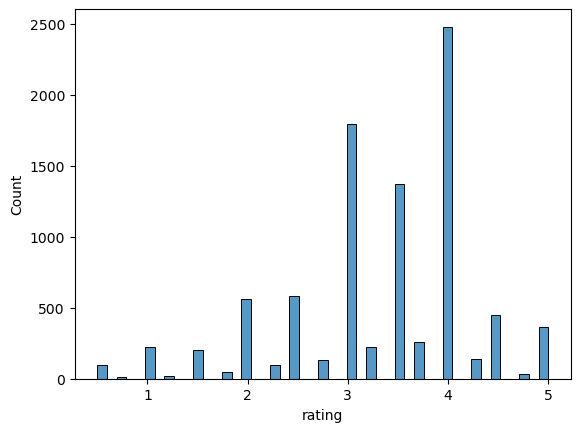

In [55]:
sns.histplot(data = rating_movies,
                x = "rating")

In [56]:
rating_movies["good_movies"] = rating_movies["rating"] >= 3

Some notes:
1. Uneven distribution & heavily biased toward high ratings
    - The largest peak is seen around a rating of 4, with over 2,500 films/ratings.
    - The number of ratings at a score of 3 is also quite large (1,700+), while low ratings (1 or 2) are relatively few.
2. Ratings tend to be positive
    - The majority of viewers or reviewers gave ratings ≥ 3, indicating a generally favorable perception of the films collected.
3. There are ratings in the decimal (continuous) range
    - The high variation in the numbers within each rating bin indicates that the ratings may be on a continuous scale (e.g., 1.0–5.0 in 0.1 increments), rather than simply whole integer ratings of 1–5.

## Determining the proportion of good_movies
Calculates the proportion of movies with ratings above a certain threshold (e.g., > 3) compared to the overall data set, to determine the dominance of good-quality movies in the dataset.

<Axes: ylabel='count'>

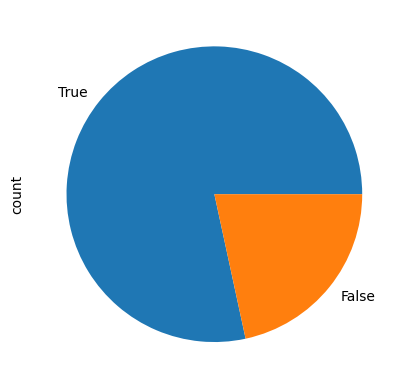

In [57]:
rating_movies["good_movies"].value_counts().plot(kind = "pie")

More than 50% of the data are films that have a rating >3.

## Understanding the distribution of film duration
Analyze the overall length of films (using either a histogram or KDE) to understand whether films tend to be short or long.

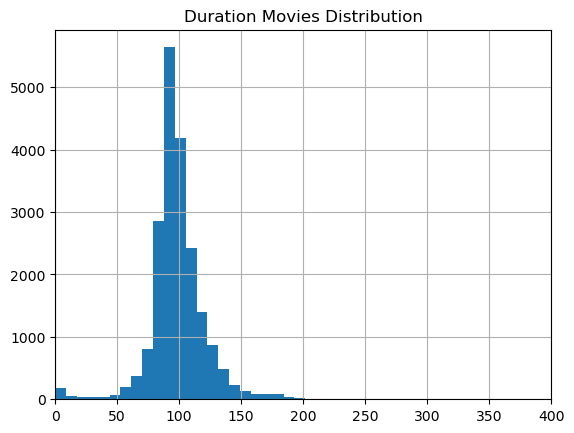

In [58]:
movies_data['runtime'].hist(bins=100)
plt.title('Duration Movies Distribution')
plt.xlim(0,400)
plt.show()

In [59]:
movies_data['runtime'].describe()

count    20412.000000
mean        99.292279
std         27.446841
min          0.000000
25%         88.000000
50%         96.000000
75%        108.000000
max        877.000000
Name: runtime, dtype: float64

Some notes:
* The histogram is approximately bell-shaped but slightly right-skewed.
* This indicates that the majority of films are around 90-120 minutes long, which is common in the modern film industry.
* There is a clear peak (mode) around 90-100 minutes, indicating that this is the most commonly produced length.

## Understanding the relationship between 90-120 minute films and ratings
Depicting the relationship between film length and ratings to see if duration impacts audience perception of a film.

In [60]:
#filter films with a duration of 90-120 minutes
duration_movies_90 = movies_data[(movies_data['runtime'] >=90) & (movies_data['runtime'] <120)]

#combine dataframe duration_movies_90 with rating_movies
duration_and_rating = duration_movies_90.merge(rating, left_on='id', 
                                               right_on='movieId', how='inner')

<Axes: xlabel='rating', ylabel='Count'>

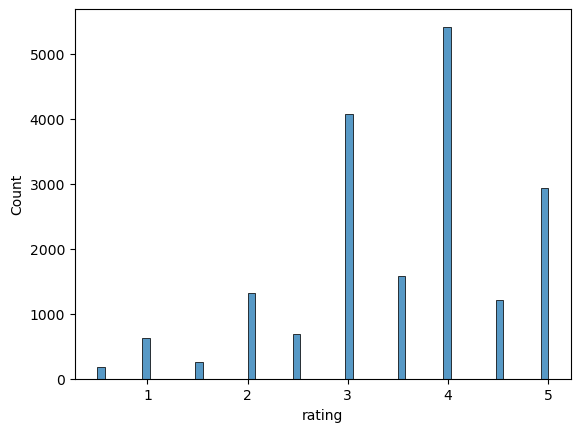

In [61]:
sns.histplot(data=duration_and_rating, x='rating')

Films that have good ratings mostly have a duration of between 90–120 minutes.

## Understanding the distribution of film profits
Explore the profit value (revenue - budget) to see its distribution and whether there are any specific patterns, such as high profits only for certain films.

In [62]:
movies_data['profit'] = movies_data['revenue'] - movies_data['budget']

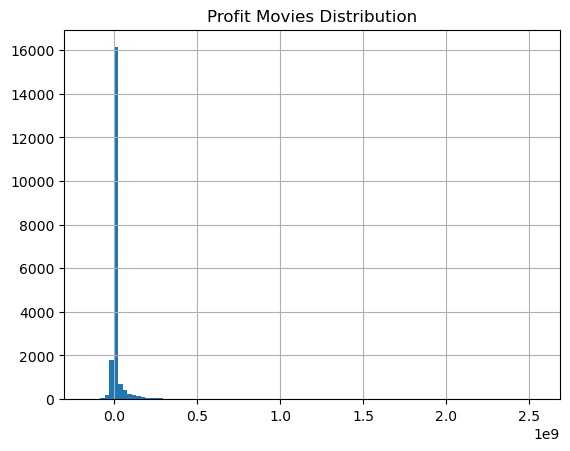

In [63]:
# Histogram
movies_data['profit'].hist(bins=100)
plt.title('Profit Movies Distribution')
plt.show()

In [64]:
movies_data['profit'].describe()

count    2.041200e+04
mean     1.514787e+07
std      7.596066e+07
min     -1.657101e+08
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.550965e+09
Name: profit, dtype: float64

## Spotting outliers using a boxplot
Use a boxplot to identify extreme values (outliers) in numeric columns such as runtime, rating, or profit, which could impact your model or analysis.

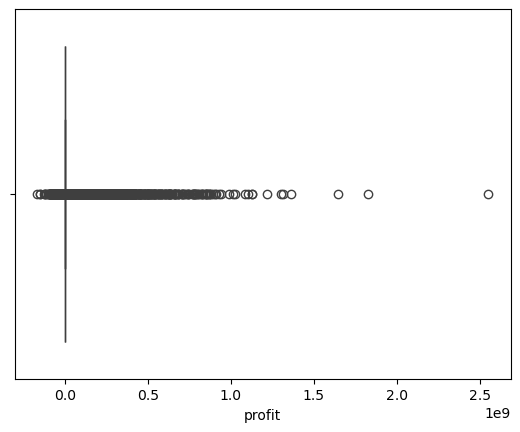

In [65]:
import seaborn as sns
sns.boxplot(data=movies_data, x='profit')
plt.show()

Points that are very far from the median line are outliers. We can address these outliers using several methods, such as direct deletion, imputation, and M-estimation. Each method has its own advantages and disadvantages, depending on the specific needs.

The descriptive statistics above show that >75% of films have profits below 0. Let's look at the quantiles (tenths) of the "profit" column.

In [66]:
movies_data['profit'].quantile(0.9)

np.float64(29858351.600000057)

This means that only 10% of the total films make a profit.

## Knowing the relationship between profit and rating

In [67]:
rating["good_movies"] = rating["rating"] >= 3

In [68]:
profitable_movies = movies_data[movies_data['profit'] > 0]
#combine profitable_movies with rating_movies
new_df = profitable_movies.merge(rating, left_on="id", right_on='movieId', how='inner')

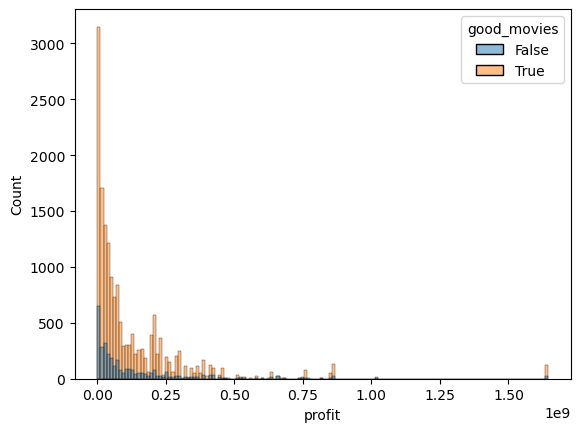

In [69]:
sns.histplot(data=new_df, x='profit', hue='good_movies')
plt.show()

Films that have good ratings do not necessarily make big profits.

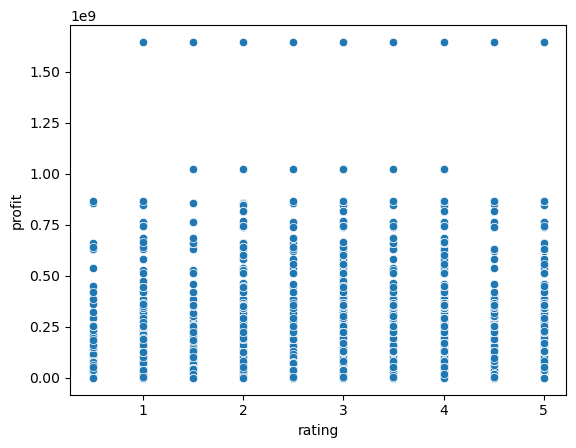

In [70]:
sns.scatterplot(data=new_df, x='rating', y='profit')
plt.show()

Film-film yang ratingnya di bawah 3, keuntungannya di bawah 1 milyar.

## Summary

1. More than 50% of the data are films with a rating of >3.
2. The average film is around 94 minutes long.
3. Films with good ratings are mostly between 90 and 120 minutes long.
4. Only 10% of films make a profit.
5. Films with good ratings don't necessarily make large profits.
6. Films with ratings below 3 generate less than 1 billion rupiah in revenue.

## Calculates the average, median, and number of users who rated a film
Provides summary statistics such as the average rating, median rating, and number of users per film to understand the distribution of audience participation and perceptions of a film.

In [71]:
rating.groupby("movieId")["rating"].agg(["mean","median","count"])

,mean,median,count
movieId,,,
1,3.872470,4.0,247
2,3.401869,3.0,107
3,3.161017,3.0,59
4,2.384615,3.0,13
5,3.267857,3.0,56
...,...,...,...
161944,5.000000,5.0,1
162376,4.500000,4.5,1
162542,5.000000,5.0,1


# Model Bulding

## Create a function to select target columns and features
Create a flexible function to extract targets (labels) and features (predictor variables) from a dataset according to analysis or modeling needs.

In [72]:
def select_columns(df: pd.DataFrame, features: list,  target: list = "rating"):

  df = df.dropna().reset_index(drop = True)
  X = df[features]
  y = (df[target] >= 3).astype("int")

  return X, y

## Selecting features and targets
Determine which columns will be used as input (features/X) and which columns will be used as output to be predicted (target/y), for example, the good_movies column as the target.

In [73]:
features = ["budget", "popularity", "vote_average"]
X, y = select_columns(new_df, features = features)

## Split training and testing data
Split the data into training and testing data using train_test_split to fairly evaluate model performance on unseen data.

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Standardize training data with min_max_scaler
Rescales numeric features to fall within the 0-1 range, making the model more stable and learning faster (especially for KNN or distance-based algorithms).

In [76]:
from sklearn.preprocessing import MinMaxScaler

In [77]:
minmax = MinMaxScaler()

In [78]:
minmax.fit(X_train)

MinMaxScaler()

## Creating a scaling function
Create a function to automatically scale the training and test data, so that the standardization process can be reused consistently.

In [79]:
def scaling(df, scaler):
    """Performs a scale transformation on a DataFrame and returns a new DataFrame with column names."""
    scaled_array = scaler.transform(df)
    
    try:
        columns = scaler.get_feature_names_out()
    except AttributeError:
        columns = df.columns  # fallback if scaler doesn't have that method

    return pd.DataFrame(scaled_array, columns=columns, index=df.index)

In [80]:
X_train_scaled = scaling(X_train, minmax)
X_test_scaled = scaling(X_test, minmax)

## Knowing the first line
View the first line of preprocessing or scaling results as an initial check of the data format and content.

In [81]:
X_test_scaled.iloc[0]

budget          0.223684
popularity      0.087572
vote_average    0.666667
Name: 1207, dtype: float64

## Defining the machine learning model
Determine the type of model to be used, namely K-Nearest Neighbors (KNN) and Decision Tree with initial parameters (default or tuned).

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [83]:
knn = KNeighborsClassifier(n_neighbors = 5)
dt = DecisionTreeClassifier()

## Training the model
Train the model with training data so that the model can learn patterns from the data.

In [84]:
knn.fit(X_train_scaled, y_train)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

## Making predictions with training and testing data
Using the trained model to predict labels on the training data (to check for overfitting) and the testing data (for actual model evaluation).

In [85]:
y_train_pred_knn = knn.predict(X_train_scaled)
y_train_pred_dt = dt.predict(X_train_scaled)

In [86]:
y_test_pred_knn = knn.predict(X_test_scaled)
y_test_pred_dt = dt.predict(X_test_scaled)

## Understanding the KNN Confusion Matrix
Create a custom confusion matrix for the KNN model to evaluate classification performance, such as the number of correct/incorrect predictions.

In [87]:
pd.crosstab(y_train, y_train_pred_knn)

col_0,0,1
rating,,
0,69,270
1,130,1650


In [88]:
pd.crosstab(y_test, y_test_pred_knn)

col_0,0,1
rating,,
0,13,124
1,72,700


Some notes:
1. Training data
    - The model successfully recognized most of the well-rated movies, but:
    - A significant number of bad movies were still classified as good, which could lead to an overestimation of the movie's quality.
    - A small number of good movies were also incorrectly classified as bad, but the number was relatively small.
    - This means the model was quite confident in calling the movie good, but was less careful in filtering out movies that were actually bad.
2. Test data
    - The error pattern was similar to the training data, indicating model consistency, but also consistency in that movies with bad ratings were still often considered good and the model remained strong in recognizing good movies.
    - This could be dangerous in the context of recommendations, as users could be recommended movies that did not meet their expectations.

## Understanding the Decision Tree Confusion Matrix
Creating a confusion matrix for a Decision Tree model allows for performance comparisons between models.

In [89]:
pd.crosstab(y_train, y_train_pred_dt)

col_0,0,1
rating,,
0,58,281
1,28,1752


In [90]:
pd.crosstab(y_test, y_test_pred_dt)

col_0,0,1
rating,,
0,17,120
1,31,741


Some notes:
1. Training Data
    - The model is very good at identifying good movies, with a very small number of misclassified good movies (only 28 out of 1,780).
    - However, bad movies are still frequently mistaken for good movies (281 out of 339), indicating the model's weakness in filtering out low-quality movies.
    - Compared to KNN, Decision Tree is more accurate at detecting good movies and is more careful with good movies.
2. Test Data
    - The model maintains fairly consistent performance.
    - This means that the weak patterns in the training data are repeated in the test data, indicating that the model does not yet adequately recognize the characteristics of bad movies.

## Understanding Model Precision, Recall, F1-score, and Accuracy
Measuring model performance in terms of precision, sensitivity (recall), and the balance between the two (F1-score).

In [91]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision_knn = precision_score(y_test, y_test_pred_knn)
recall_knn = recall_score(y_test, y_test_pred_knn)
f1_knn = f1_score(y_test, y_test_pred_knn)
accuracy_knn = accuracy_score(y_test, y_test_pred_knn)

precision_dt = precision_score(y_test, y_test_pred_dt)
recall_dt = recall_score(y_test, y_test_pred_dt)
f1_dt = f1_score(y_test, y_test_pred_dt)
accuracy_dt = accuracy_score(y_test, y_test_pred_dt)

df_metrics = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Score_KNN': [precision_knn, recall_knn, f1_knn, accuracy_knn],
    'Score_dt': [precision_dt, recall_dt, f1_dt, accuracy_dt]
})

print(df_metrics)

      Metric  Score_KNN  Score_dt
0  Precision   0.849515  0.860627
1     Recall   0.906736  0.959845
2   F1-Score   0.877193  0.907532
3   Accuracy   0.784378  0.833883


Some notes:
1. Accuracy
    - Decision Tree outperforms KNN with an accuracy of 83.39%, compared to KNN's 78.44%.
    - This means that overall, Decision Tree makes more accurate predictions on the test data.
2. Precision
    - KNN's precision is 84.95%, while Decision Tree's is 86.06%.
    - This means that when the model predicts a good movie, Decision Tree is slightly more reliable than KNN in ensuring that the prediction is actually a good movie.
3. Recall
    - KNN's recall is 90.67%, while Decision Tree's is much higher at 95.98%.
    - This shows that Decision Tree is better able to catch almost all good movies, rarely missing any.
    - This is important in the context of recommendations, where we don't want to miss any quality movies.
4. F1-Score
    - KNN's F1-Score is 87.71%, while Decision Tree's is 90.75%.
    - The F1-score is a balanced combination of precision and recall, and Decision Tree wins hands down.
    - This demonstrates Decision Tree's excellent balance between precision and completeness in recognizing good movies.

## Understanding the classification report model
Displaying a complete report containing precision, recall, f1-score, and support (number of cases per class) is very useful for a comprehensive evaluation.

In [92]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_test_pred_knn))

              precision    recall  f1-score   support

           0       0.15      0.09      0.12       137
           1       0.85      0.91      0.88       772

    accuracy                           0.78       909
   macro avg       0.50      0.50      0.50       909
weighted avg       0.74      0.78      0.76       909



In [93]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_test_pred_dt))

              precision    recall  f1-score   support

           0       0.35      0.12      0.18       137
           1       0.86      0.96      0.91       772

    accuracy                           0.83       909
   macro avg       0.61      0.54      0.55       909
weighted avg       0.78      0.83      0.80       909



# Hyperparameter tuning

## View parameters that can be improved
Explore model parameters (e.g., KNeighborsClassifier) that can be changed to improve performance, such as n_neighbors, weights, or metrics.

In [94]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

## Increasing the n_neighbors parameter
Try increasing or decreasing the n_neighbors value for KNN (e.g., from 5 to 10) and see how it affects accuracy or other metrics.

In [95]:
knn_params = KNeighborsClassifier(n_neighbors = 7, p=1)

## Training the model to be improved
Retrain the KNN model (or other model) with new hyperparameter values so that the model re-learns the data patterns with that configuration.

In [96]:
knn_params.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7, p=1)

## Understanding the improved model's classification report
Compare model performance before and after tuning using the classification report (precision, recall, f1-score).

In [97]:
print(classification_report(y_test, knn_params.predict(X_test)))

              precision    recall  f1-score   support

           0       0.31      0.07      0.12       137
           1       0.86      0.97      0.91       772

    accuracy                           0.84       909
   macro avg       0.58      0.52      0.51       909
weighted avg       0.77      0.84      0.79       909



## Hyperparameter Tuning with Grid Search
Using GridSearchCV to systematically find the best hyperparameter combination (e.g., combinations of various n_neighbors and weights values).

Grid search is a well-known hyperparameter tuning algorithm. In grid search, the algorithm determines which hyperparameters and performance metrics are best suited for a selected machine learning model.

In [98]:
from sklearn.model_selection import GridSearchCV
knn_params = {'n_neighbors': [3, 5, 7, 9], 'p': [1,2,3,4,5] }
knn_new = GridSearchCV(KNeighborsClassifier(), knn_params, scoring='f1')

In [99]:
knn_new.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2, 3, 4, 5]},
             scoring='f1')

## Finding the best parameters
Displays the best parameter values found by Grid Search along with their evaluation scores (e.g., highest accuracy).

In [100]:
knn_new.best_params_

{'n_neighbors': 7, 'p': 1}

## Making predictions
Using the best model (Grid Search results) to predict the test data.

In [101]:
knn_best = knn_new.best_estimator_ 
knn_new.predict(X_test) #prediksi kelas 1 atau 0

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [102]:
prob = knn_best.predict_proba(X_test)[:, 1]
(prob >=0.5).astype('int')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

This .predict function actually comes from the probability class .predict_proba class

It can be seen that the output produced by both is the same.

Then, we can display a data frame containing the precision, recall, f1 score, and accuracy from the probability iteration.

In [103]:
recall_ = []
precision_ = []
f1_score_ = []
accuracy_ = []
for i in range (1,11):
  y_best_knn_proba = knn_best.predict_proba(X_test)[:, 1]
  recall_.append(recall_score(y_test, y_best_knn_proba >=i/10))
  precision_.append(precision_score(y_test, y_best_knn_proba >=i/10))
  f1_score_.append(f1_score(y_test, y_best_knn_proba >=i/10))
  accuracy_.append(accuracy_score(y_test, y_best_knn_proba >=i/10))

In [104]:
pd.DataFrame({'recall': recall_, 'precision': precision_, 'f1_score' : f1_score_, 'accuracy':accuracy_})

,recall,precision,f1_score,accuracy
0,1.000000,0.849285,0.918501,0.849285
1,1.000000,0.849285,0.918501,0.849285
2,0.981865,0.852643,0.912703,0.840484
3,0.981865,0.852643,0.912703,0.840484
4,0.971503,0.855188,0.909642,0.836084
5,0.917098,0.864469,0.890006,0.807481
6,0.917098,0.864469,0.890006,0.807481
7,0.800518,0.870423,0.834008,0.729373
8,0.475389,0.886473,0.618887,0.502750
9,0.475389,0.886473,0.618887,0.502750


We can use the dataframe above as a reference for which probability class produces the best score.

# Thank You